# Example: Data Import, Review, and Workflow

## Introduction

Data quality review is an unavoidable and critical step in any analysis.  It is more often the case that you will analyze data collected by someone else, or we will use data from many different sources.  In this course, we'll work with water level and flow data collected by Water Survey of Canada (WSC) and other sources.  **In engineering practice, it is the responsibility of the practitioner to review any data used as the basis for design or decision making.**  Datasets from open repsitories are often accompanied by a disclaimer, see the [WSC disclaimer](https://wateroffice.ec.gc.ca/disclaimer_info_e.html) for example.

As datasets grow, it becomes necessary to use programmatic approaches to data review. This notebook provides an introduction to opening and reviewing the content of files programmatically. In this example, we import a `csv` (comma-separated-value) file from a measurement device commonly used in hydrologic practice.  There is a limit to the size of dataset we can manually review for anomalies.  

When starting out learning to code in Python, there are a few simple tasks that may seem unneccessarily complex.  Importing data is one such task, where in Excel we click on a file to open it and *most of the time* the program already knows whether a cell contains a number or text, for example.  In Python we don't *have to* declare the type of data we're working with, but  the example below demonstrates a common data import problem and how to work through it.

>**Note**: the `#` symbol used extensively below is used for adding comments that are useful to convey information to someone else reviewing or using your code.  The Python interpreter ignores all lines starting with `#`.

### What in all the heck does this have to do with hydrology??

Time invested in learning basics of the tools will save many hours of frustration that can then be reinvested as time spent exploring and testing hydrologic concepts using observational data.  **Automating file handling enables a powerful set of tools for investigation.**

In [1]:
# import libraries
# --> libraries are collections of functions developed by communities of 
# open source software developers that typically focus on solving very specific problems

# pandas is a library that manipulates "dataframes", table-like structures,
# to efficiently run operations on large datasets

import pandas as pd
# numpy is a fundamental library for scientific computing
# based on the representation of data as arrays
import numpy as np
# matplotlib is a plotting library
from matplotlib import pyplot as plt

# this is a command to tell the notebook to display figures
# within the notebook instead of creating new windows.
%matplotlib inline

## File Path

**A basic but fundamental concept is to understand how to read a file that's saved anywhere on your computer's file system**, or on a completely different computer!.  In modern operating systems, most of the time we just click on a file, and the correct program starts and opens the file.  In Python, we need to be explicit about where a file resides on the system.  It is important to understand that this Jupyter notebook interprets file paths **relative** to where the notebook file is saved.

The notebook file I'm using in this demonstration is labeled `Data_Import_and_Review.ipynb`, and it's saved under `<something>/Engineering_Hydrology_Notebooks/content/notebooks/Introduction/Data_Import_and_Review.ipynb`, where `<something>` is the file path where you saved and unpacked the archive (zip) file.  

### Download the project data file

To begin, download the code repository from GitHub by following the link to [https://github.com/dankovacek/Engineering_Hydrology_Notebooks](https://github.com/dankovacek/Engineering_Hydrology_Notebooks), clicking the green 'code' button and downloading a zip file of the code repository, as shown below:

![Github download page](img/github_dl_page.png)

On most systems, the file will go to a `Downloads/` folder by default.  **Save (or move) the file (and unzip) somewhere deliberate** on your computer, like in your Documents folder.  Mine is saved to `/home/Documents/Engineering_Hydrology_Notebooks`.  This folder will be referred to as the **project root**.

### File Structure

At the project root level, the structure is roughly as follows:

```
/home/Documents/Engineering_Hydrology_Notebooks
│   README.md
│   requirements.txt    
│
└───content
│   │   config.yml
│   │   intro.md
│   │   markdown.md
│   │   _toc.yml
│   │
│   └───_build
│       │   ...
│       │   
│   └───img
│       │   ...
│       │   
│   └───notebook_data
│       │   ...
│       │   
│   └───notebooks
|   │   └───Introduction       <--This is the location of Data_Import_and_Review.ipynb
|   │   └───Notebook_1
|   │   └───...
│       │   
│   └───project_data           <--This is the location of the data that will be used for the term project
│       │   ...
│       │   
```
At the bottom of the file structure, there is a folder called `project_data` that contains a number of csv files you will be using for your term project.  Let's try opening `Hidden_Creek_stage_data.csv`.  

## Read a csv file

If I want to open a data file (let's call it *data.csv*) from within this notebook, I could simply save it to the same folder as this notebook file.  We could then read the csv file using pandas using simply the filename:

`df = pd.read_csv('data.csv')`

>**Note**: above we call the function `read_csv` from the pandas library using the short form `pd`.  The file path is simply `data.csv` in this case, and note that it must be a string, i.e. surrounded by 'single quotes' or "double quotes", either is fine.

In many cases, we want to keep our data organized and avoid creating duplicates, so we will often keep data elsewhere.  If the file is saved elsewhere, there are a couple of ways we can specify its location.  Next, we'll walk through an example of reading a csv data file from the project data, which is saved in a file called `Hidden_Creek_stage_data.csv`.

If we try to open this file using just the filename, the Jupyter interface will look for a file with that name at the project root level, **but it won't find it**. 

Instead, you'll see an error like:

```
FileNotFoundError                         Traceback (most recent call last)
<ipython-input-5-b872b6bb0ac8> in <module>
      3 # in this case  is located in the
      4 # Open the folder and navigate to where
----> 5 df = pd.read_csv('Hidden_Creek_stage_data.csv')
```

In [2]:
data = pd.read_csv('Hidden_Creek_stage_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Hidden_Creek_stage_data.csv'

This error occurs because we told the interpreter that the file lives at the level of the project root.  Recall this notebook file is saved in the folder at `/home/Documents/Engineering_Hydrology_Notebooks/content/notebooks/Introduction/`.  Let's check the file path of the working directory:

In [3]:
# first, import the "operating system" function library
import os

#store the curent working directory path as a string
working_directory = os.getcwd()
# show the current path
working_directory

'/home/danbot/Documents/UBC/Teaching_Assistant/Engineering_Hydrology_Notebooks/content/notebooks/Introduction'

>**Note**: if the last line of a code block is just a variable, the interpreter will print the variable.  If you want to print something that isn't the last line of code in a block, you need to use a `print(...)` function, i.e. `print(working_directory)`.

Above, we have saved the current working directory to a variable called `working_directory`.  We can use this variable to list the contents of the directory with the `listdir()` function from the `os` library to list directory contents.  Let's do this for the current working directory.  


In [4]:
os.listdir(working_directory)

['.ipynb_checkpoints',
 'Example_Notebook.ipynb',
 'img',
 'Data_Import_and_Review.ipynb']

Here we can see that there are no `.csv` files in the current working directory.  That's because the project data is saved at `/home/Documents/Engineering_Hydrology_Notebooks/content/project_data`.  

### Alternative ways to specify a file path

Let's open the stage (water level) data file (`Hidden_Creek_stage_data.csv`) from the `project_data/` directory.  

1.  Simply use the full filepath to read the file.  Mine is:  
`/home/Documents/Engineering_Hydrology_Notebooks/content/project_data/Hidden_Creek_stage_data.csv`

Let's try this (update the string below to the correct path):

In [5]:
# note, here you need to replace "somewhere" with the rest of your filepath as described above
data_path = '<somewhere>/Engineering_Hydrology_Notebooks/content/project_data/Hidden_Creek_stage_data.csv'

In [6]:
# data = pd.read_csv(data_path)
# data

2.  Alternatively, we can navigate from the location of this notebook file (the "current working directory") to the data file.  The Pandas `read_csv('<filepath>')` function reads  (`../`) in the filepath to mean "go up one level" from the working directory.  Looking at the file structure [outlined above](#File-Structure), or simply opening the project root folder (`Engineering_Hydrology_Notebooks/`), we can see that the `project_data/` folder is **two levels up** from the current working directory.  We can use this feature to create a relative path from the current working directory.

Let's look at how this works using the `listdir` function.  

In [7]:
os.listdir('../')

['Notebook_2',
 'Notebook_5',
 'Notebook_4',
 'Introduction',
 'Notebook_1',
 'Notebook_3']

In [8]:
os.listdir('../../')

['project_data',
 'markdown.md',
 '_toc.yml',
 '_build',
 'notebooks',
 'intro.md',
 'notebook_data',
 'img',
 '_config.yml']

Above, we can now see the `project_data/` folder.  Let's list its contents:

In [9]:
os.listdir('../../project_data')

['measured_EC_data_C.csv',
 'measurement_calibration_B.csv',
 'regional_streamflow',
 'Metadata_C.txt',
 'measured_EC_data_A.csv',
 'measurement_calibration_C.csv',
 'measured_EC_data_B.csv',
 'Metadata_A.txt',
 'Hidden_Creek_stage_data.csv',
 'Metadata_B.txt',
 'Project_QH_table_2021.csv',
 'measurement_calibration_A.csv']

This folder contains `Hidden_Creek_stage_data.csv`, so we can construct the filepath for our data.  Here I'm going to store the path as a variable and call it `HC_data_path`:

In [10]:
data_folder = '../../project_data/'
HC_data_path = data_folder + 'Hidden_Creek_stage_data.csv'
# alternatively, I could use the os.path.join() function to create the path, i.e. 
# HC_data_path = os.path.join(data_folder, 'Hidden_Creek_stage_data.csv')
pd.read_csv(HC_data_path)

,ID,PARAM,Date,year,month,day,Value
0,00XX000,2,2010/08/25,2010,8,25,0.83
1,00XX000,2,2010/08/26,2010,8,26,0.876
2,00XX000,2,2010/08/27,2010,8,27,1.16
3,00XX000,2,2010/08/28,2010,8,28,0.867
4,00XX000,2,2010/08/29,2010,8,29,0.711
...,...,...,...,...,...,...,...
672,00XX000,2,2012/06/27,2012,6,27,1.95
673,00XX000,2,2012/06/28,2012,6,28,2
674,00XX000,2,2012/06/29,2012,6,29,2.38
675,00XX000,2,2012/06/30,2012,6,30,2.71


3.  The `../` shortcut works in Jupyter and with Pandas, but it doesn't work in all situations.  A more robust way to "look up one level" is to use the `os.dirname()` function to get the name of the parent directory of the current working directory.

Recall `os.getcwd()` gets the current working directory. 

In [11]:
parent_dir = os.path.dirname(os.getcwd())
parent_dir

'/home/danbot/Documents/UBC/Teaching_Assistant/Engineering_Hydrology_Notebooks/content/notebooks'

In [12]:
os.listdir(parent_dir)

['Notebook_2',
 'Notebook_5',
 'Notebook_4',
 'Introduction',
 'Notebook_1',
 'Notebook_3']

Listing the results shows the same folders as we saw above using `../`.

In [13]:
gparent_dir = os.path.dirname(parent_dir)
gparent_dir

'/home/danbot/Documents/UBC/Teaching_Assistant/Engineering_Hydrology_Notebooks/content'

In [14]:
os.listdir(gparent_dir)

['project_data',
 'markdown.md',
 '_toc.yml',
 '_build',
 'notebooks',
 'intro.md',
 'notebook_data',
 'img',
 '_config.yml']

We've found the `project_data` folder a different way.

We can create intermediate variables as short forms for accessing different folders, or we can chain the `os.path.dirname()` function to move up an arbitrary number of levels. i.e.:

In [15]:
data_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'project_data')
data_dir

'/home/danbot/Documents/UBC/Teaching_Assistant/Engineering_Hydrology_Notebooks/content/project_data'

In [16]:
os.listdir(data_dir)

['measured_EC_data_C.csv',
 'measurement_calibration_B.csv',
 'regional_streamflow',
 'Metadata_C.txt',
 'measured_EC_data_A.csv',
 'measurement_calibration_C.csv',
 'measured_EC_data_B.csv',
 'Metadata_A.txt',
 'Hidden_Creek_stage_data.csv',
 'Metadata_B.txt',
 'Project_QH_table_2021.csv',
 'measurement_calibration_A.csv']

According to the [**Don't Repeat Yourself**](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, it's a good idea to use variables to store file and folder paths to avoid writing or declaring things twice (more typing = more chance of introducing a typo).  I generally specify important paths the very beginning of a work file, and I use variable names that are easy to understand, i.e. `data_folder = <some path to data>`

>**Note**:  It is good practice to use variable names that are easy to understand.  For example, if you are storing a number you've calculated that represents average annual flow, consider the difference between `qa` and `avg_annual_flow_m3s`.  The former might make sense in one moment, but not to someone else or to yourself a year later.  The latter is much clearer, and it also contains a sort of encoding of the **units** (m3s is easy to interpret as $\frac{m^3}{s}$, or cms = "**c**ubic **m**etres per **s**econd") &mdash; units are important!!

### This is taking forever, open a file already!!

Taking what we learned above, lets create a variable to store the filepath for the Hidden Creek stage data.

In [17]:
HC_stage_data_path = os.path.join(data_dir, 'Hidden_Creek_stage_data.csv')

In [18]:
df = pd.read_csv(HC_stage_data_path)
# the "head()" function prints just the first five rows.  
# You can specify how many rows to show by entering an integer in the function, i.e. df.head(10) up to 50 rows 
df.head()

,ID,PARAM,Date,year,month,day,Value
0,00XX000,2,2010/08/25,2010,8,25,0.83
1,00XX000,2,2010/08/26,2010,8,26,0.876
2,00XX000,2,2010/08/27,2010,8,27,1.16
3,00XX000,2,2010/08/28,2010,8,28,0.867
4,00XX000,2,2010/08/29,2010,8,29,0.711


The dataframe object (we've saved it as `df`) also has a handy function `describe()` that displays some basic summary statistics.

In [19]:
df.describe(include='all')

,ID,PARAM,Date,year,month,day,Value
count,677,677.0,677,677.000000,677.000000,677.000000,677
unique,1,NaN,677,NaN,NaN,NaN,406
top,00XX000,NaN,2012/06/14,NaN,NaN,NaN,NaN
freq,677,NaN,1,NaN,NaN,NaN,87
mean,NaN,2.0,NaN,2011.079764,6.446086,15.819793,NaN
std,NaN,0.0,NaN,0.674661,3.574085,8.853510,NaN
min,NaN,2.0,NaN,2010.000000,1.000000,1.000000,NaN
25%,NaN,2.0,NaN,2011.000000,3.000000,8.000000,NaN
50%,NaN,2.0,NaN,2011.000000,6.000000,16.000000,NaN
75%,NaN,2.0,NaN,2012.000000,10.000000,24.000000,NaN


Looking at the stats of the above dataframe, it appears as though the 'Value' column has non-numeric values (`NaN` = Not a Number).  We can tell this by trying to perform a calculation on the column.  If calculating the mean doesn't work, there could be a few explanations.

In [20]:
df['Value'].mean()

TypeError: Could not convert  0.830.876 1.160.8670.7110.6320.6960.8070.7140.6850.6740.6520.6490.6210.6080.5790.6260.676 1.35 1.190.8830.7860.7980.7430.838 1.89 2.74  1.8 1.18 1.08 1.56 1.35 2.81 2.39 2.85 1.76 1.31 1.090.949 0.830.7420.6710.6210.5740.586 1.56  2.8 1.45 1.190.9930.8550.7630.6950.6420.5920.5620.5190.4850.882 0.83 2.26 1.73 1.59 1.25 1.09  1.1 1.01  1.5 2.79 2.49 1.68 1.47 1.56 1.46 2.26 1.51 1.25 1.080.9570.8690.8030.765 0.89 1.45 1.19 1.070.9160.538 0.370.735 1.44 1.150.6390.4920.5260.4850.4580.4910.5120.4780.4470.423 0.320.4070.482 1.37 1.43 1.05 0.82 2.01 2.09 1.67 1.29 1.050.876 0.770.6910.6280.5880.5690.594 1.13 1.96 1.54  1.20.9730.8170.7490.8060.6090.6310.4940.4210.4210.4580.6840.6890.4730.4330.1490.1870.508 1.37 1.97 2.31 2.62 1.85 1.39 1.140.9720.848 0.750.6950.6790.6890.7210.7170.7730.7070.4020.4030.4690.5140.5650.6610.6340.6840.6590.589 0.540.5150.6280.721 0.820.9610.6880.5930.5140.4410.4030.3710.3530.3240.2930.3850.3390.265 0.270.2530.2860.2890.2710.2710.2550.2410.2340.2790.5430.6110.6330.799 1.26  1.2  1.20.8580.6710.5780.5120.4950.5270.5070.4720.4870.5060.5030.5320.6040.741 1.31 1.26 1.040.8830.7810.7170.6750.6040.5430.5220.5460.8970.7620.6680.6550.6130.5830.5480.5080.4780.4440.4220.4120.4290.493 0.630.731 0.840.8820.7850.7360.7280.854 1.01 1.02 1.11 1.22 1.27 1.25 1.17  1.3    2 2.07 1.61 1.79 2.38 2.18 1.91 1.69 1.66 1.94 2.19 2.05 1.98 1.85 1.83 2.03 1.79 1.59  1.6 1.94 1.95 2.09 2.04 1.97 2.02  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 2.13 2.09    2 1.98 2.04 1.85 1.69 1.88  1.9 2.23 1.89 1.69 1.67 1.77 1.88 1.88 1.77 1.74 1.67 1.56 1.49 1.46 1.38 1.28  1.2 1.15 1.15 1.18 1.16 1.23 1.34  1.8 1.86 1.42  1.4 1.34 1.25 1.27 1.31 1.22 1.25 1.080.9560.8460.8340.8420.8610.8580.8870.9480.977 1.02 0.99 0.920.8370.8490.9970.908 1.190.9660.754 0.66 1.65 2.71 1.66 1.73 2.46 3.09 2.03 1.41 1.12 0.940.838 1.43 1.36 1.110.9590.9180.849 1.01 1.14 3.07 2.66  1.9 1.43 1.180.9820.8380.742  0.7 1.09  1.3 1.43  1.4 1.070.8780.7740.7120.7030.7690.923 1.070.8510.7550.7210.6680.6210.5730.536 0.520.5240.9040.9530.8660.7530.6870.6180.5930.6010.5570.4910.4630.4660.928 1.240.798 0.660.626 3.35  2.1 1.45 1.18 1.030.9060.8190.745 0.69 0.650.6150.5740.545 0.530.5090.469 0.46 0.450.4360.4260.4430.5790.5470.5210.4880.4530.4440.4740.5290.5860.573 1.19  1.6 1.180.9560.7920.7390.933 2.08 2.13  1.4 1.110.953 1.17 1.150.9740.8470.7590.7060.6530.6120.5730.4990.524 0.510.6890.6390.5810.5750.7040.6480.5590.5060.6620.8550.8550.8410.7270.6780.7030.688 0.650.6280.6110.6220.6860.8640.8470.7720.7070.6490.5980.5620.624 0.580.5210.5010.5550.5450.5160.504 0.470.4030.3830.3730.3420.3310.3410.452  0.70.6050.4920.4450.4650.5870.6740.6360.5680.4840.6640.7590.6210.5320.4750.4280.3970.3770.3640.3460.3540.4160.4610.6360.9930.9010.7710.6630.6090.6230.6680.6280.5850.553 0.550.6340.924 1.24 1.28 1.26 1.22 1.17 1.18 1.24 1.15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 1.94  1.8 1.89  2.5 2.61 2.17 1.89 1.86 1.82 1.75 1.87 1.67  1.6 1.76 2.07 2.24 2.13 1.87 2.24 2.95 2.63 2.16 2.01 2.24 2.43 2.56 2.39 2.06 2.04 1.95    2 2.38 2.71 3.02 to numeric

We can see the mean calculation throws a big, ugly error:

    ValueError: could not convert ... to numeric:

When you import a csv with pandas, it will try to figure out the type of each column.  If pandas can't figure it out, it will leave the values as strings.  In this case, and this is very common when working with files coming from different places (other software, hardware systems, etc.), some values which are non-numeric are included somewhere in the file.  We don't want to go through a big csv and manually change the files, because what if we have to deal with hundreds of files, or millions of rows?  You may have come across similar issues in Excel.


### Accessing data in the dataframe

We have the data stored in a variable called `df`, but it's not immediately obvious how to work with it.  The Pandas library is incredibly powerful for filtering, slicing, and indexing data in many ways.  Our dataframe is a table with named columns.  We can list the column names as follows:

In [21]:
df.columns

Index(['ID', 'PARAM', 'Date', 'year', 'month', 'day', 'Value'], dtype='object')

We can access any combination of columns, run operations on single rows or the entire table.  We can retrieve the `Value` column by indexing it like so `df['Value']` which returns an array of all the values (like a vector).

In [22]:
df['Value']

0       0.83
1      0.876
2       1.16
3      0.867
4      0.711
       ...  
672     1.95
673        2
674     2.38
675     2.71
676     3.02
Name: Value, Length: 677, dtype: object

Calling the `Value` column returns an array of numbers, but above there was an error trying to calculate the mean.  

We can verify the type of values in the column by calling the built-in `type` function.  Below we look at the first value in the array using an integer index, in this case the first value in the array `df['Value']` is accessed using square brackets, i.e. `df['Value'][0]`.  If we wanted the 18th value, it would be `df['Value'][17]` because like many programming languages, **Python starts counting at 0 instead of 1**.  

In [23]:
type(df['Value'][0])

str

The data type of the elements of the `Value` column are string ('str') because of some unfortunate but common characteristic of the infinite variety of data source formats.  A large part of data analysis is identifying and fixing these types of issues!


### Converting data types


We are working with numeric data that we want to perform calculations on, so the data type needs to be some numeric type (other types are boolean, string, sequence, mappings, classes, etc).  In most cases, we use `float`, short for *floating point* numbers.  The other numeric type is `int` or *integer* (i.e. 1, 2, 3).  

We can change the type of values in a few ways.  Let's try using the `.astype()` function from pandas, and then check the data type.  Let's also create a more informative variable name (variable and unit information should be specified somewhere, here let's assume it's stage (water level), expressed in metres.)

In [26]:
print(type(df['Value'][0]))
df['stage_m'] = df['Value'].astype(float)
print(type(df['stage_m'][0]))

<class 'str'>
<class 'numpy.float64'>


We can see the type is now (64 bit) floating point. 

Floating point is the term used to describe the way computers represent fractions.  From the [Python documentation](https://docs.python.org/3/tutorial/floatingpoint.html), the number `0.125` is represented as $\frac{1}{10}+\frac{2}{100}+\frac{5}{1000}$.  Most numbers can't be perfectly represented this way because we don't have infinite memory (think of pi, or the fraction `1/3`, for example). 

Let's try calculating a mean again.  

In [27]:
df['stage_m'].mean()

1.0374559322033898

### Visualizing the data and some first steps for validation

Now if we plot the data as a time series, we can see **there are a few gaps** in the data.

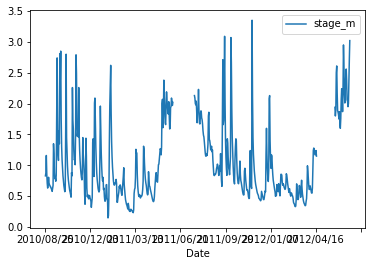

In [28]:
df.plot('Date', 'stage_m')

We can isolate the missing periods by filtering for all rows where the value is `NaN`, which stands for **not a number**.

In [29]:
gaps = df[df['stage_m'].isnull()]

gaps

,ID,PARAM,Date,year,month,day,Value,stage_m
284,00XX000,2,2011/06/05,2011,6,5,NaN,NaN
285,00XX000,2,2011/06/06,2011,6,6,NaN,NaN
286,00XX000,2,2011/06/07,2011,6,7,NaN,NaN
287,00XX000,2,2011/06/08,2011,6,8,NaN,NaN
288,00XX000,2,2011/06/09,2011,6,9,NaN,NaN
...,...,...,...,...,...,...,...,...
638,00XX000,2,2012/05/24,2012,5,24,NaN,NaN
639,00XX000,2,2012/05/25,2012,5,25,NaN,NaN
640,00XX000,2,2012/05/26,2012,5,26,NaN,NaN
641,00XX000,2,2012/05/27,2012,5,27,NaN,NaN


If we know we'll be dealing with more files from this source in the future, we could begin by addressing it at the source (change how values are recorded and saved).  

In [30]:
print(len(gaps))

87


The `len` function tells us how many rows there are in a dataframe, in this case the dataframe we created by filtering for all non-numeric values (`NaN`) in the original dataset.


We can also check the mean of all columns at once:

In [31]:
df.mean()

PARAM         2.000000
year       2011.079764
month         6.446086
day          15.819793
stage_m       1.037456
dtype: float64

The mean function will skip over the non-numeric values and not include them in the calculation of summary statistics.

This may seem like a lot of work for not much value, the ability to quickly review data programmatically is especially important as datasets grow in size.  You can't visually scroll through 1 million rows in a text file or spreadsheet!